In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [2]:
dataset = pd.read_csv("C:/Users/ANITHA/Desktop/Project/Employee_Cpa/Data Sets/Training set_Human_Resources.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [3]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
dataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot: >

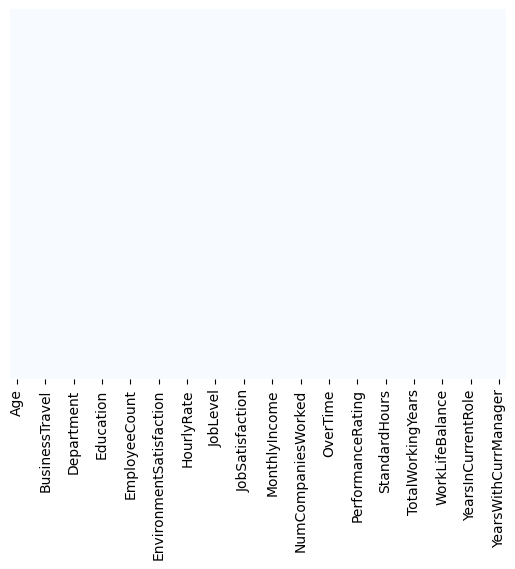

In [5]:
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [6]:
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'DailyRate'}>,
        <AxesSubplot: title={'center': 'DistanceFromHome'}>,
        <AxesSubplot: title={'center': 'Education'}>,
        <AxesSubplot: title={'center': 'EmployeeCount'}>],
       [<AxesSubplot: title={'center': 'EmployeeNumber'}>,
        <AxesSubplot: title={'center': 'EnvironmentSatisfaction'}>,
        <AxesSubplot: title={'center': 'HourlyRate'}>,
        <AxesSubplot: title={'center': 'JobInvolvement'}>,
        <AxesSubplot: title={'center': 'JobLevel'}>],
       [<AxesSubplot: title={'center': 'JobSatisfaction'}>,
        <AxesSubplot: title={'center': 'MonthlyIncome'}>,
        <AxesSubplot: title={'center': 'MonthlyRate'}>,
        <AxesSubplot: title={'center': 'NumCompaniesWorked'}>,
        <AxesSubplot: title={'center': 'PercentSalaryHike'}>],
       [<AxesSubplot: title={'center': 'PerformanceRating'}>,
        <AxesSubplot: title={'center': 'RelationshipSatisfaction'}>

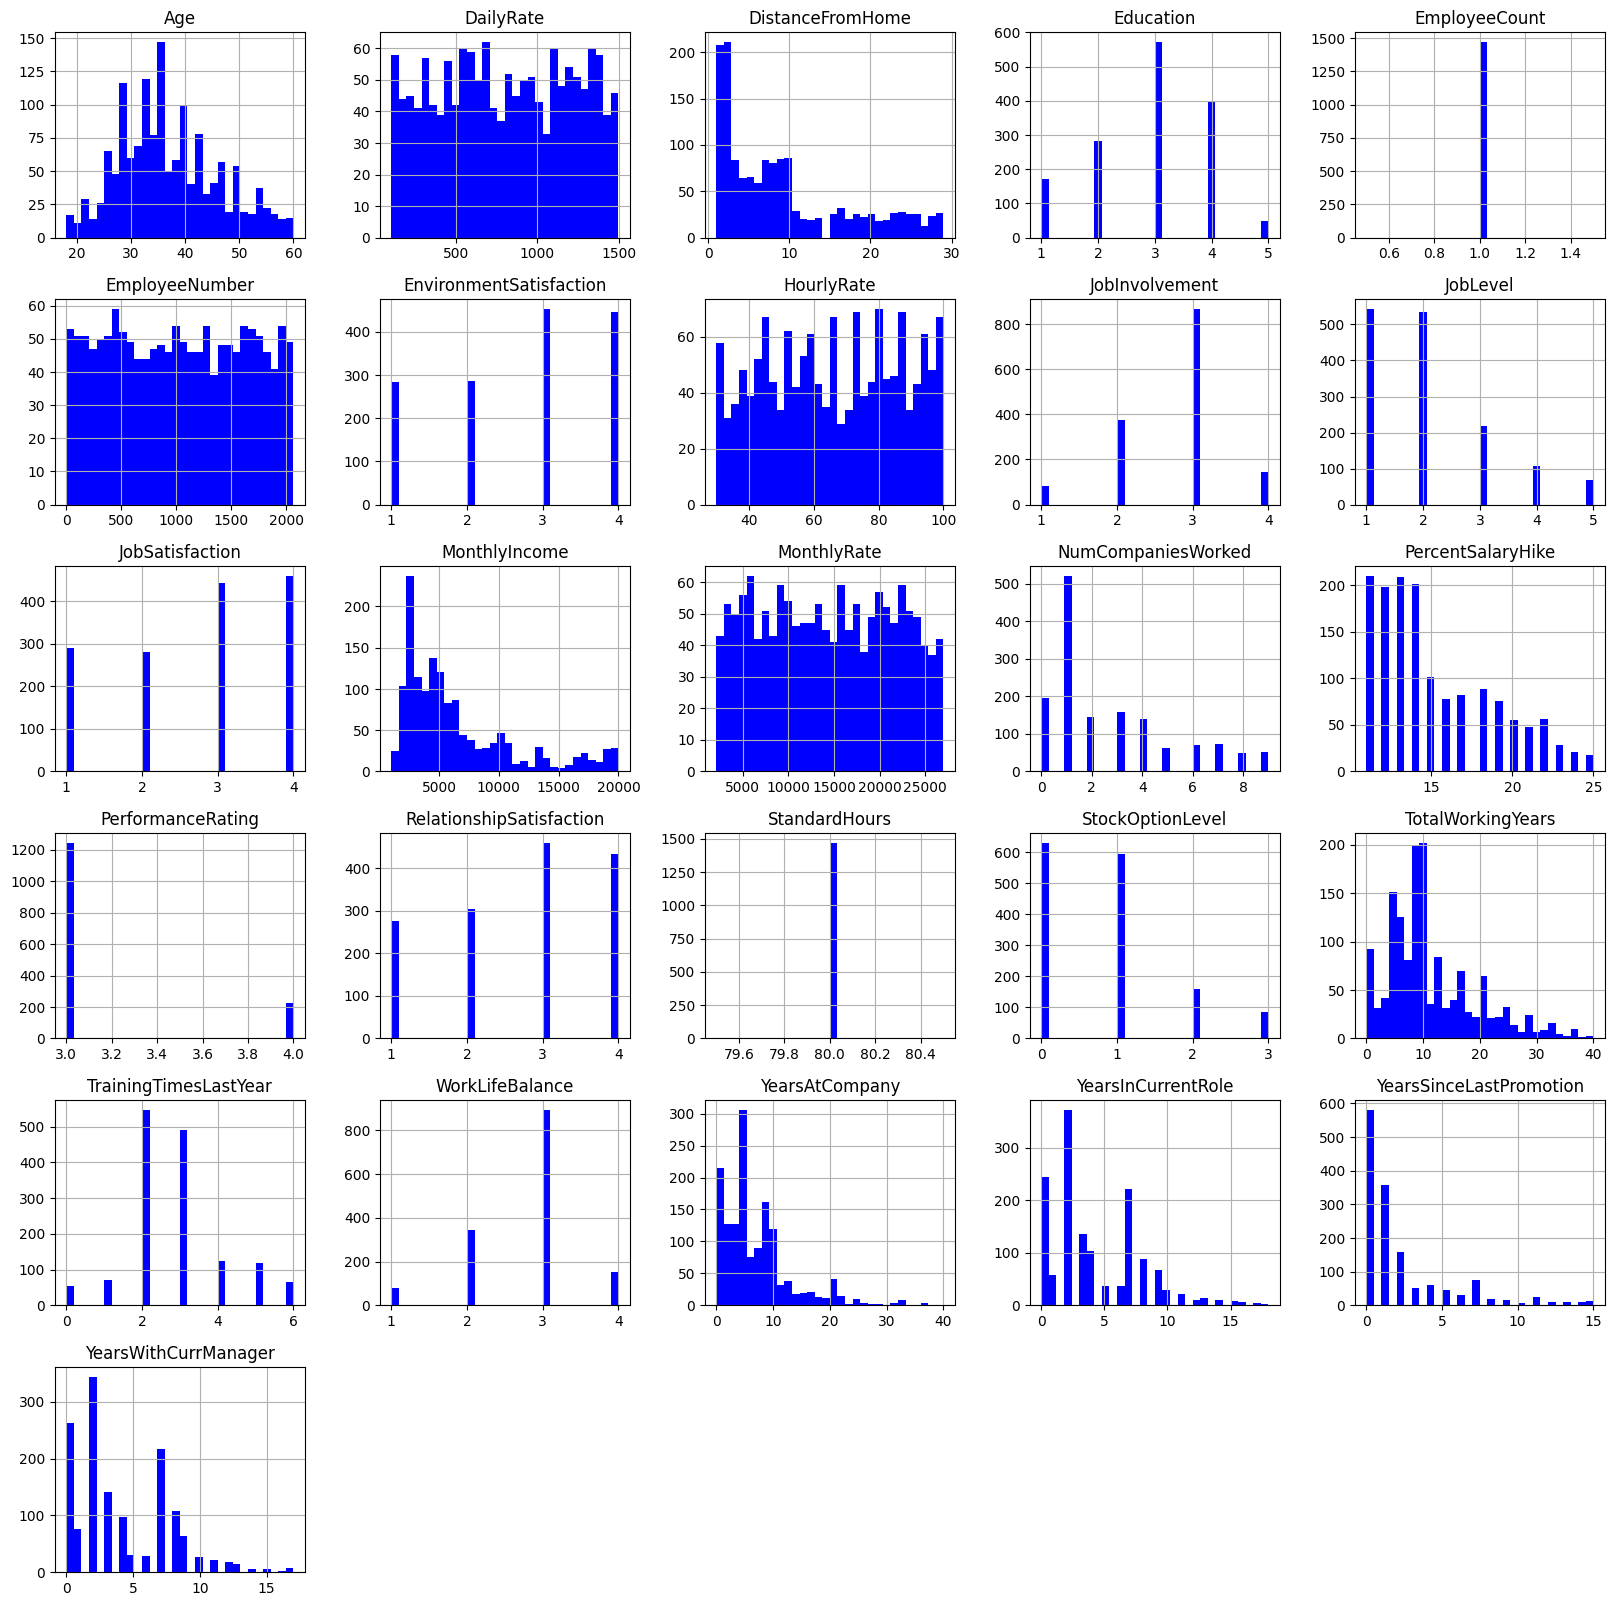

In [8]:
dataset.hist(bins = 30, figsize = (20,20), color = 'b')

In [66]:
dataset['Attrition_ind'] = 0
dataset.loc[dataset['Attrition'] == 'Yes', 'Attrition_ind'] = 1
dataset.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Attrition_ind
0,41,1,1102,1,2,1,2,94,3,2,...,0,0,1,0,0,0,1,0,1,0
1,49,0,279,8,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,0,0
2,37,1,1373,2,2,4,4,92,2,1,...,0,0,0,0,0,0,1,0,1,0
3,33,0,1392,3,4,5,4,56,3,1,...,0,1,0,0,0,1,0,0,1,0
4,27,0,591,2,1,7,1,40,3,1,...,0,0,0,0,0,1,0,1,0,0


In [10]:
data_main = dataset.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1)
data_main.head()
data_main.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_ind'],
      dtype='object')

In [11]:
data_main['Attrition']=data_main['Attrition_ind']
data_main.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_ind
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,0,8,0,1,6,4,0,5,1
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,1,10,3,3,10,7,1,7,0
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,2,0,7,3,3,0,0,0,0,1
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,0,8,3,3,8,7,3,0,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,4,1,6,3,3,2,2,2,2,0


In [12]:
data_main=data_main.drop(['Attrition_ind'],axis=1)
data_main.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [13]:
gender_dict = data_main["Gender"].value_counts()
gender_dict

Male      882
Female    588
Name: Gender, dtype: int64

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

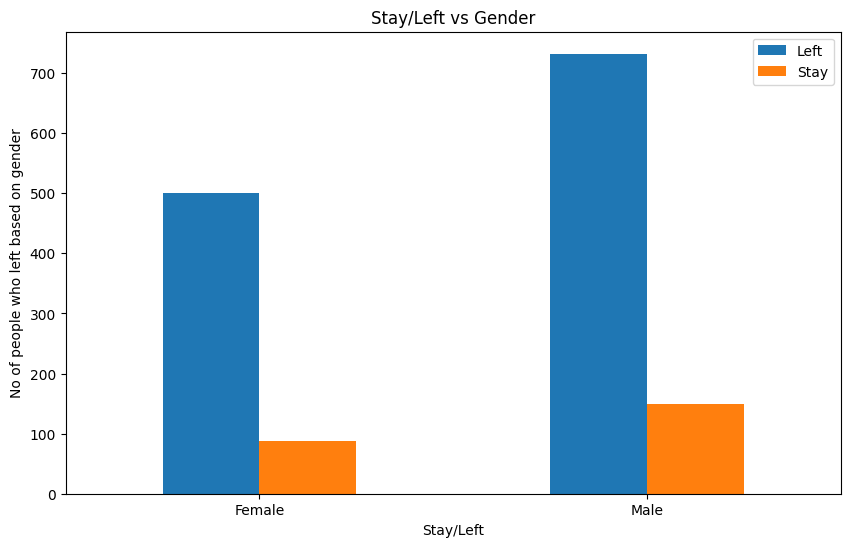

In [14]:
#Create a plot for crosstab

pd.crosstab(data_main['Gender'],data_main['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Stay/Left vs Gender")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left based on gender")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

<AxesSubplot: title={'center': 'Count of different Business Travel'}>

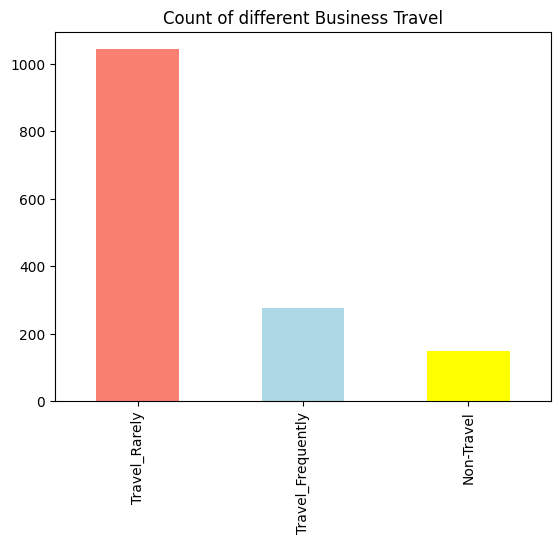

In [15]:
data_main['BusinessTravel'].value_counts().plot(kind='bar',color=['salmon','lightblue', 'yellow'],title="Count of different Business Travel")

(array([0, 1, 2]),
 [Text(0, 0, 'Non-Travel'),
  Text(1, 0, 'Travel_Frequently'),
  Text(2, 0, 'Travel_Rarely')])

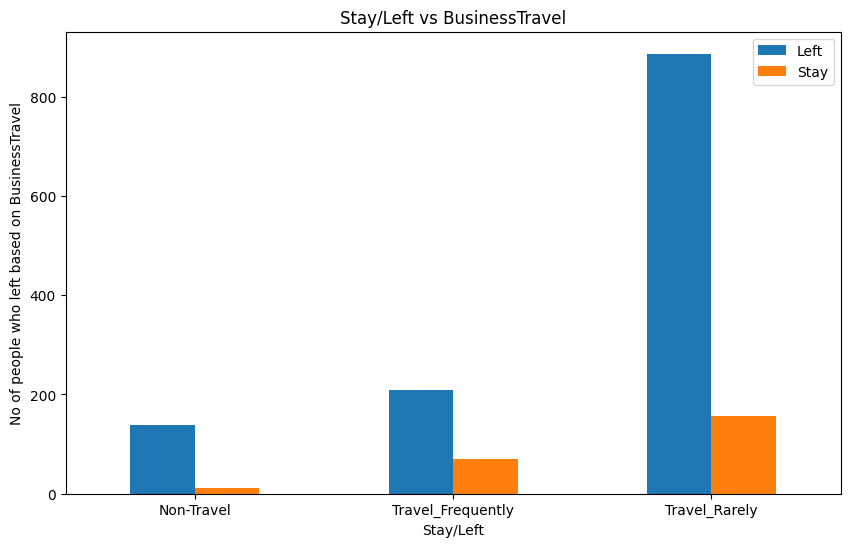

In [16]:
#Create a plot for crosstab

pd.crosstab(data_main['BusinessTravel'],data_main['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Stay/Left vs BusinessTravel")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left based on BusinessTravel")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

<AxesSubplot: title={'center': 'Count of different Depatments'}>

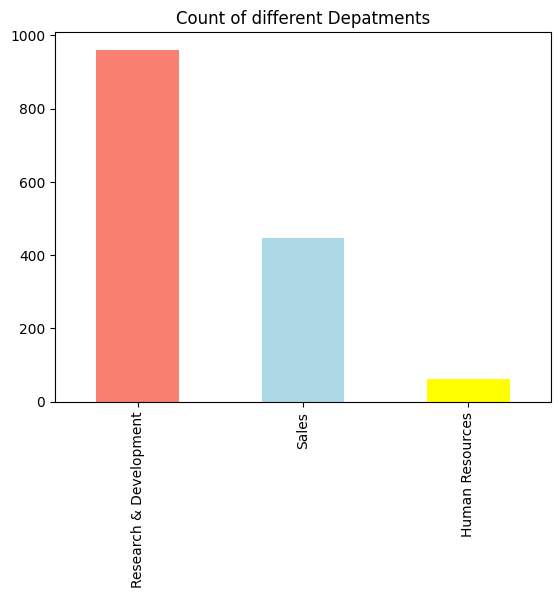

In [17]:
data_main['Department'].value_counts().plot(kind='bar',color=['salmon','lightblue', 'yellow'],title="Count of different Depatments")

(array([0, 1, 2]),
 [Text(0, 0, 'Human Resources'),
  Text(1, 0, 'Research & Development'),
  Text(2, 0, 'Sales')])

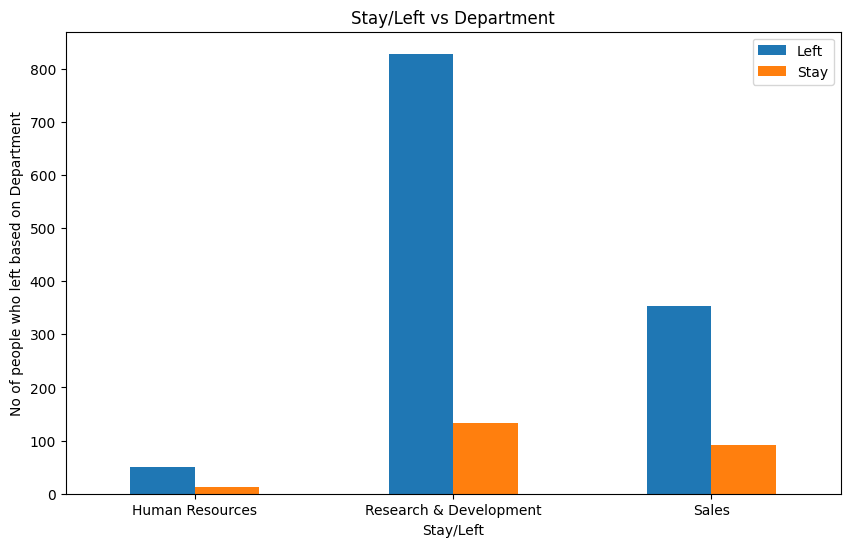

In [18]:
#Create a plot for crosstab

pd.crosstab(data_main['Department'],data_main['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Stay/Left vs Department")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left based on Department")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

<AxesSubplot: title={'center': 'Count of different Job Roles'}>

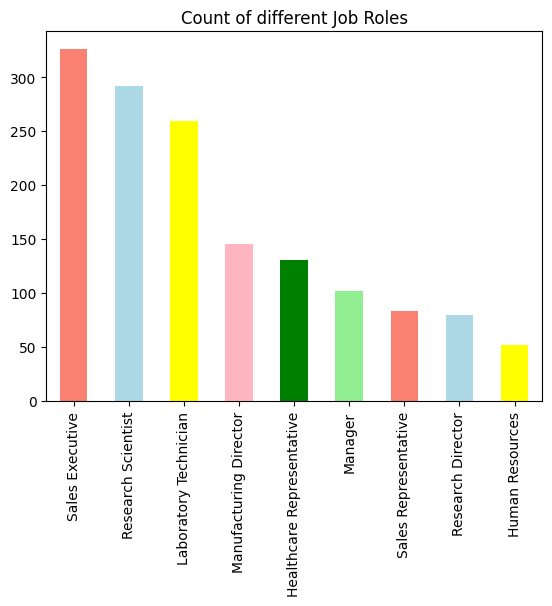

In [19]:
data_main['JobRole'].value_counts().plot(kind='bar',color=['salmon','lightblue','yellow', 'lightpink', 'green', 'lightgreen'],title="Count of different Job Roles")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Healthcare Representative'),
  Text(1, 0, 'Human Resources'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manager'),
  Text(4, 0, 'Manufacturing Director'),
  Text(5, 0, 'Research Director'),
  Text(6, 0, 'Research Scientist'),
  Text(7, 0, 'Sales Executive'),
  Text(8, 0, 'Sales Representative')])

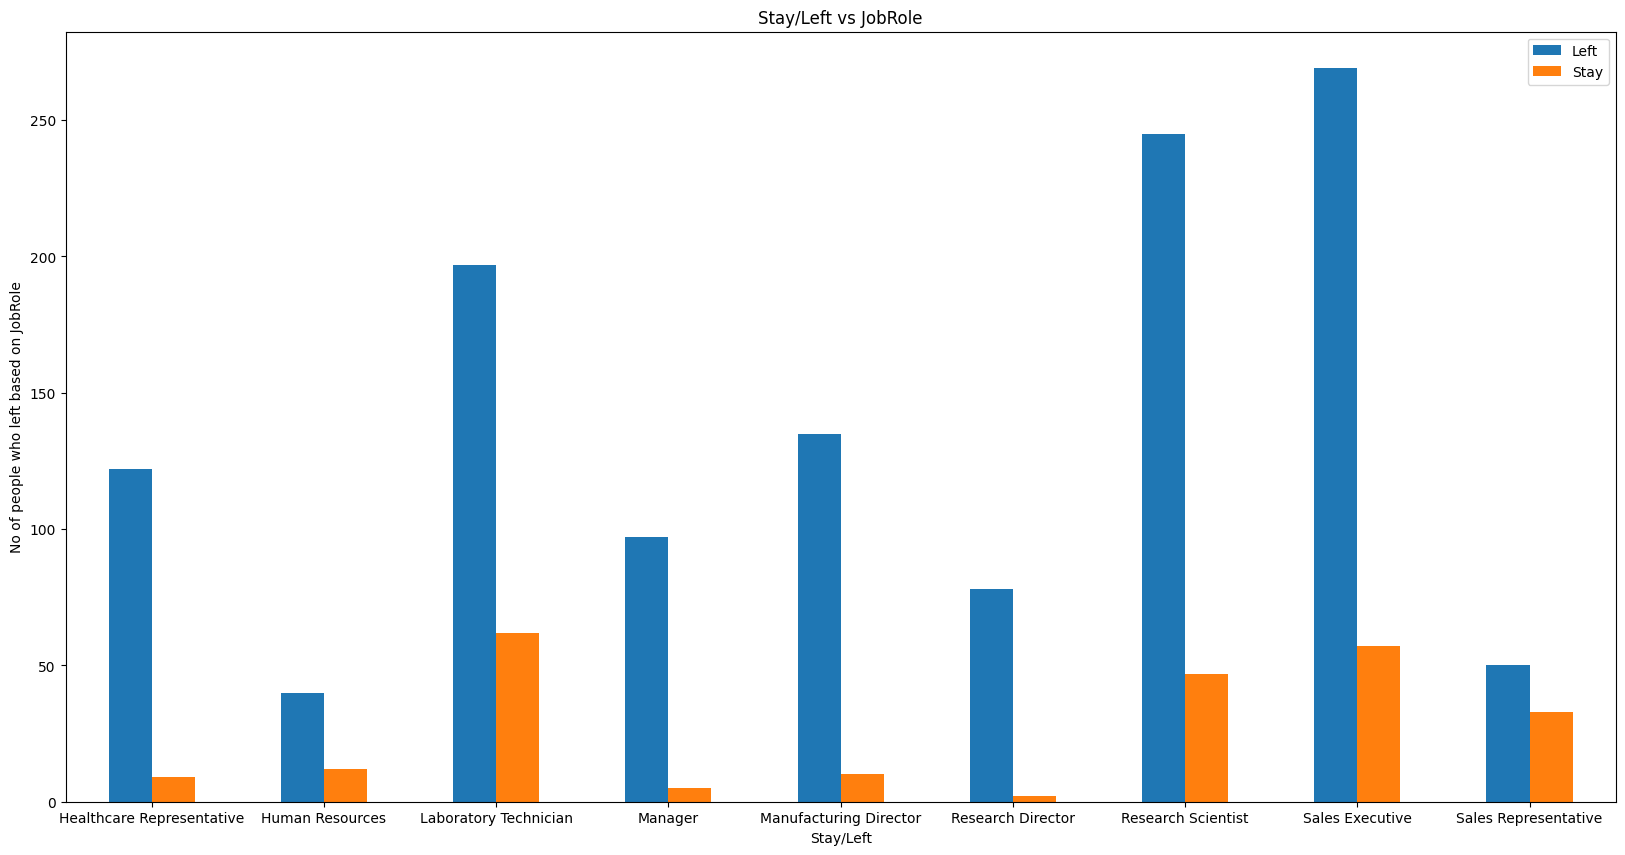

In [20]:
#Create a plot for crosstab

pd.crosstab(data_main['JobRole'],data_main['Attrition']).plot(kind="bar",figsize=(20,10))
plt.title("Stay/Left vs JobRole")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left based on JobRole")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

<AxesSubplot: title={'center': 'Count of different Marital Status'}>

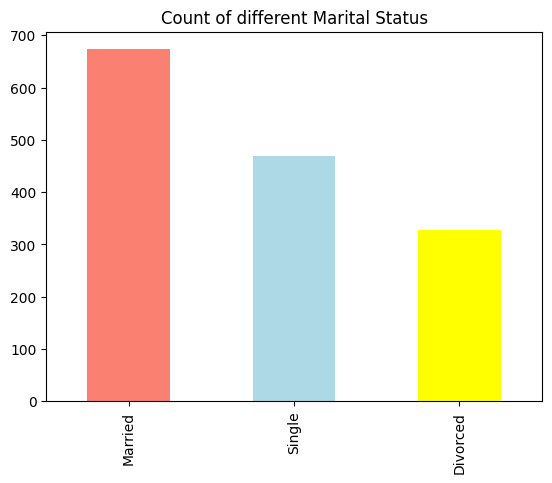

In [21]:
data_main['MaritalStatus'].value_counts().plot(kind='bar',color=['salmon','lightblue', 'yellow'],title="Count of different Marital Status")

(array([0, 1, 2]),
 [Text(0, 0, 'Divorced'), Text(1, 0, 'Married'), Text(2, 0, 'Single')])

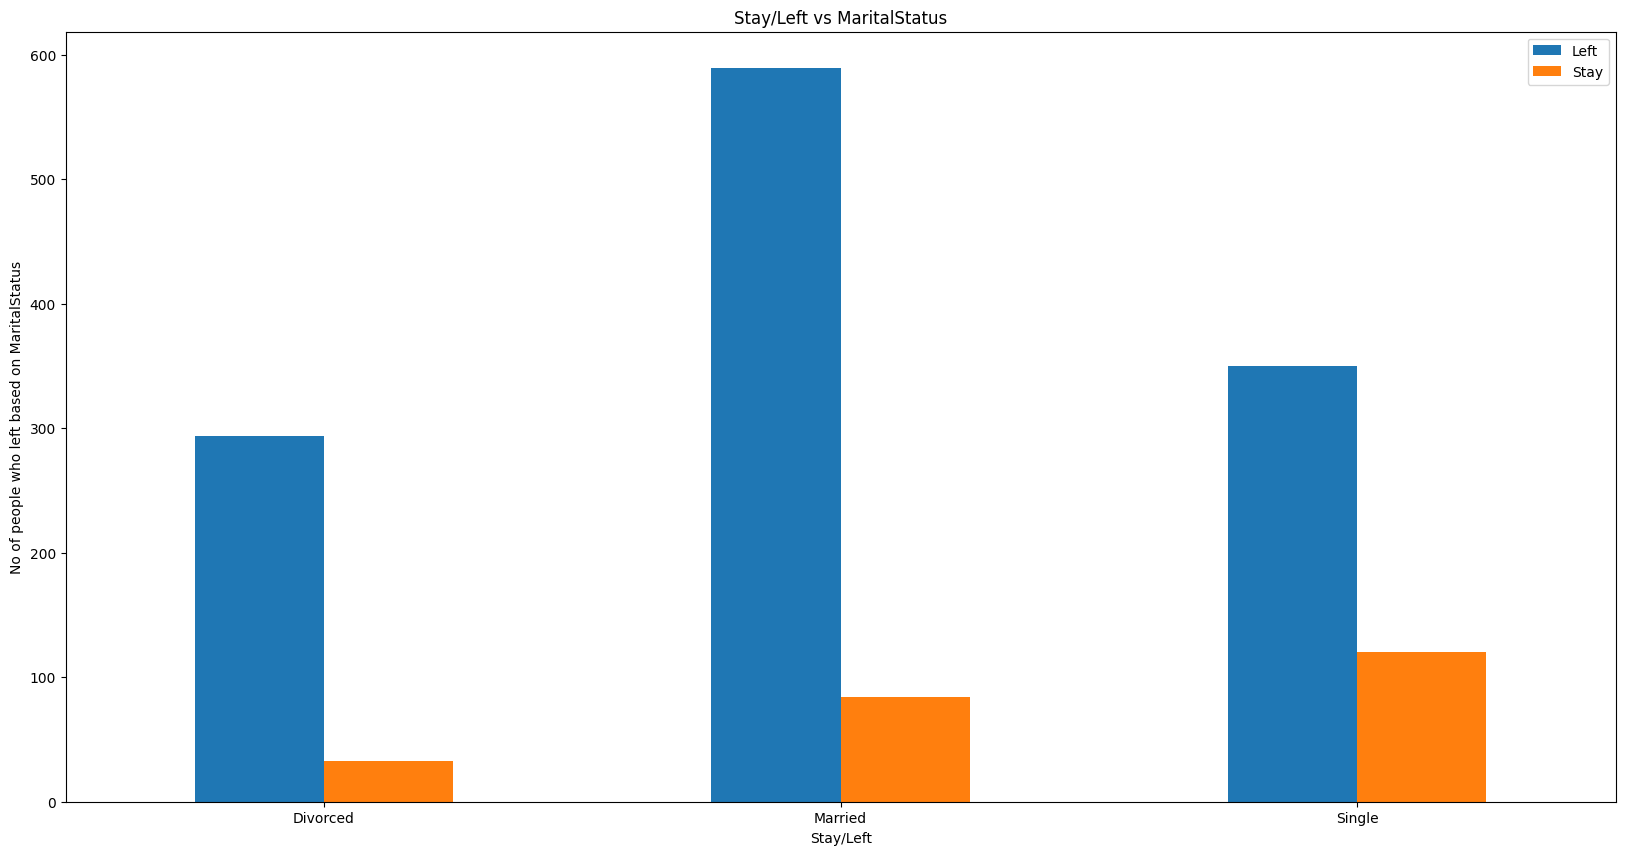

In [22]:
#Create a plot for crosstab

pd.crosstab(data_main['MaritalStatus'],data_main['Attrition']).plot(kind="bar",figsize=(20,10))
plt.title("Stay/Left vs MaritalStatus")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left based on MaritalStatus")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

<AxesSubplot: xlabel='Age', ylabel='count'>

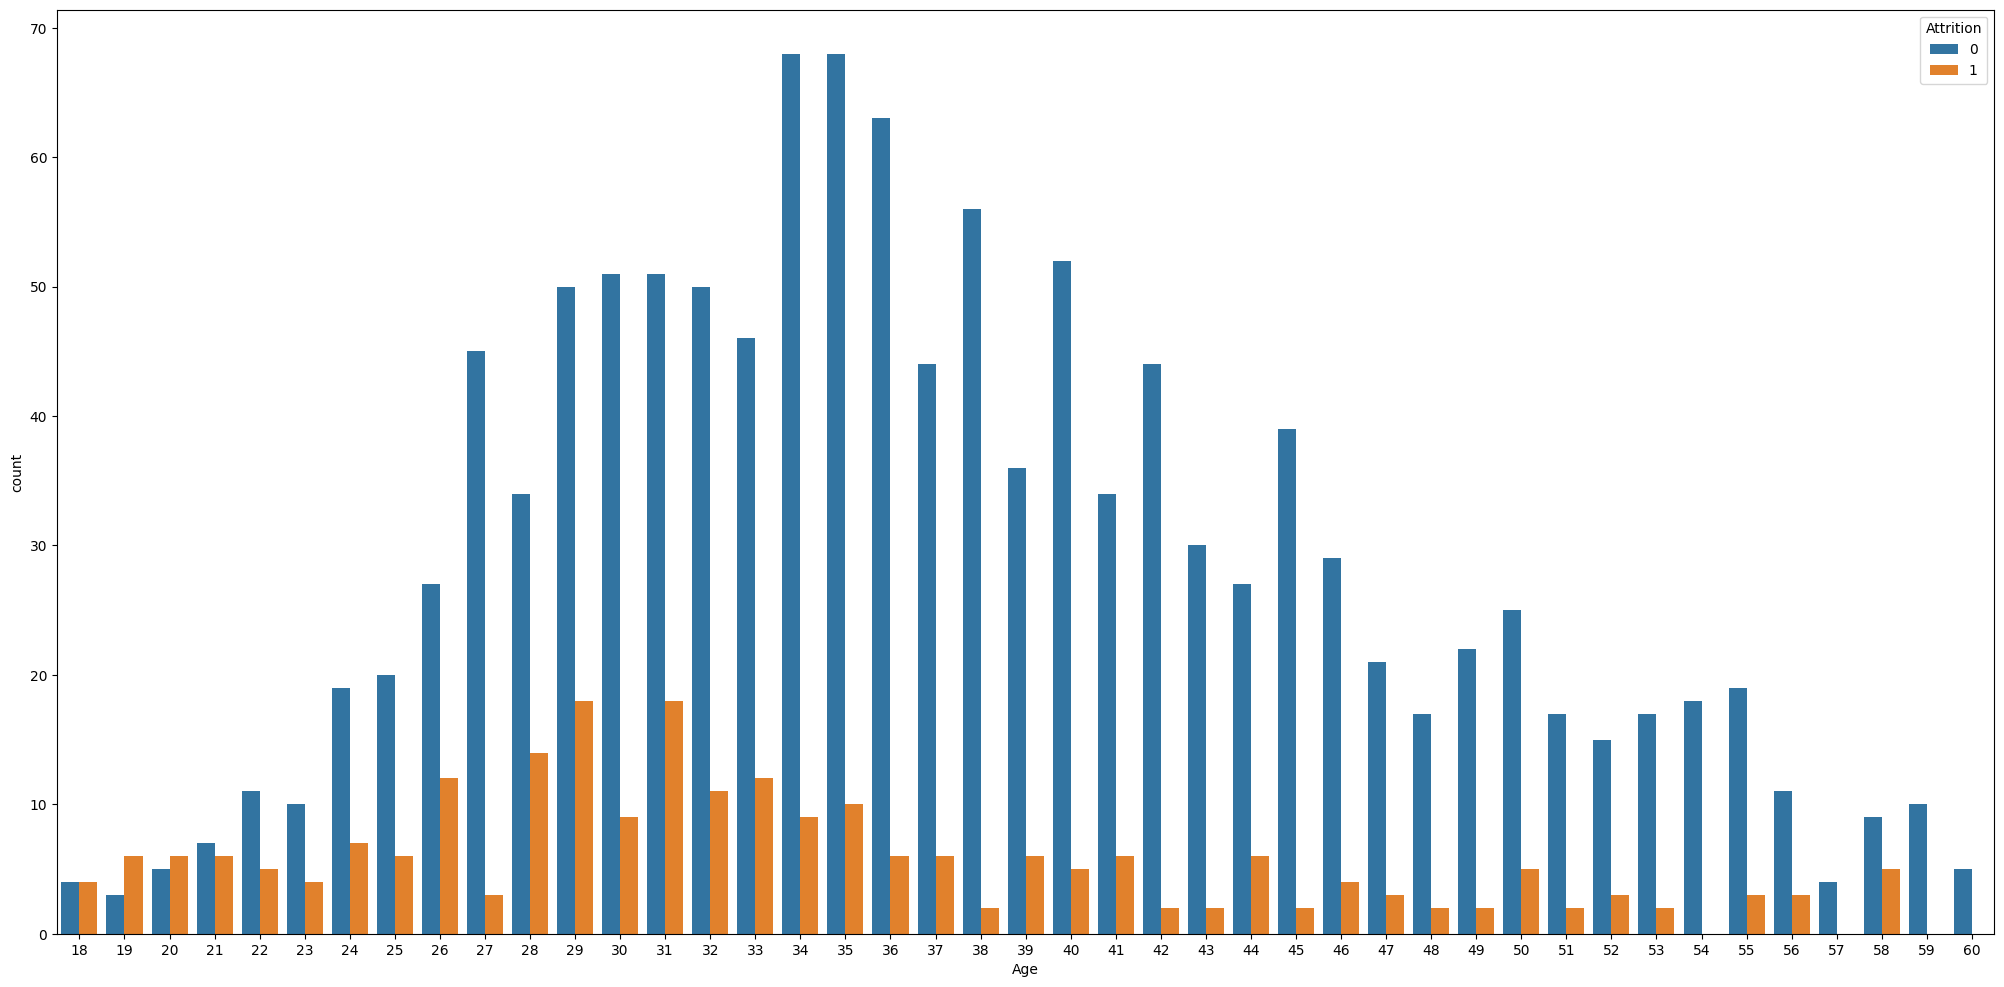

In [23]:
plt.figure(figsize=[25, 12])
sns.countplot(x = 'Age', hue = 'Attrition', data = data_main)

<AxesSubplot: xlabel='JobLevel', ylabel='count'>

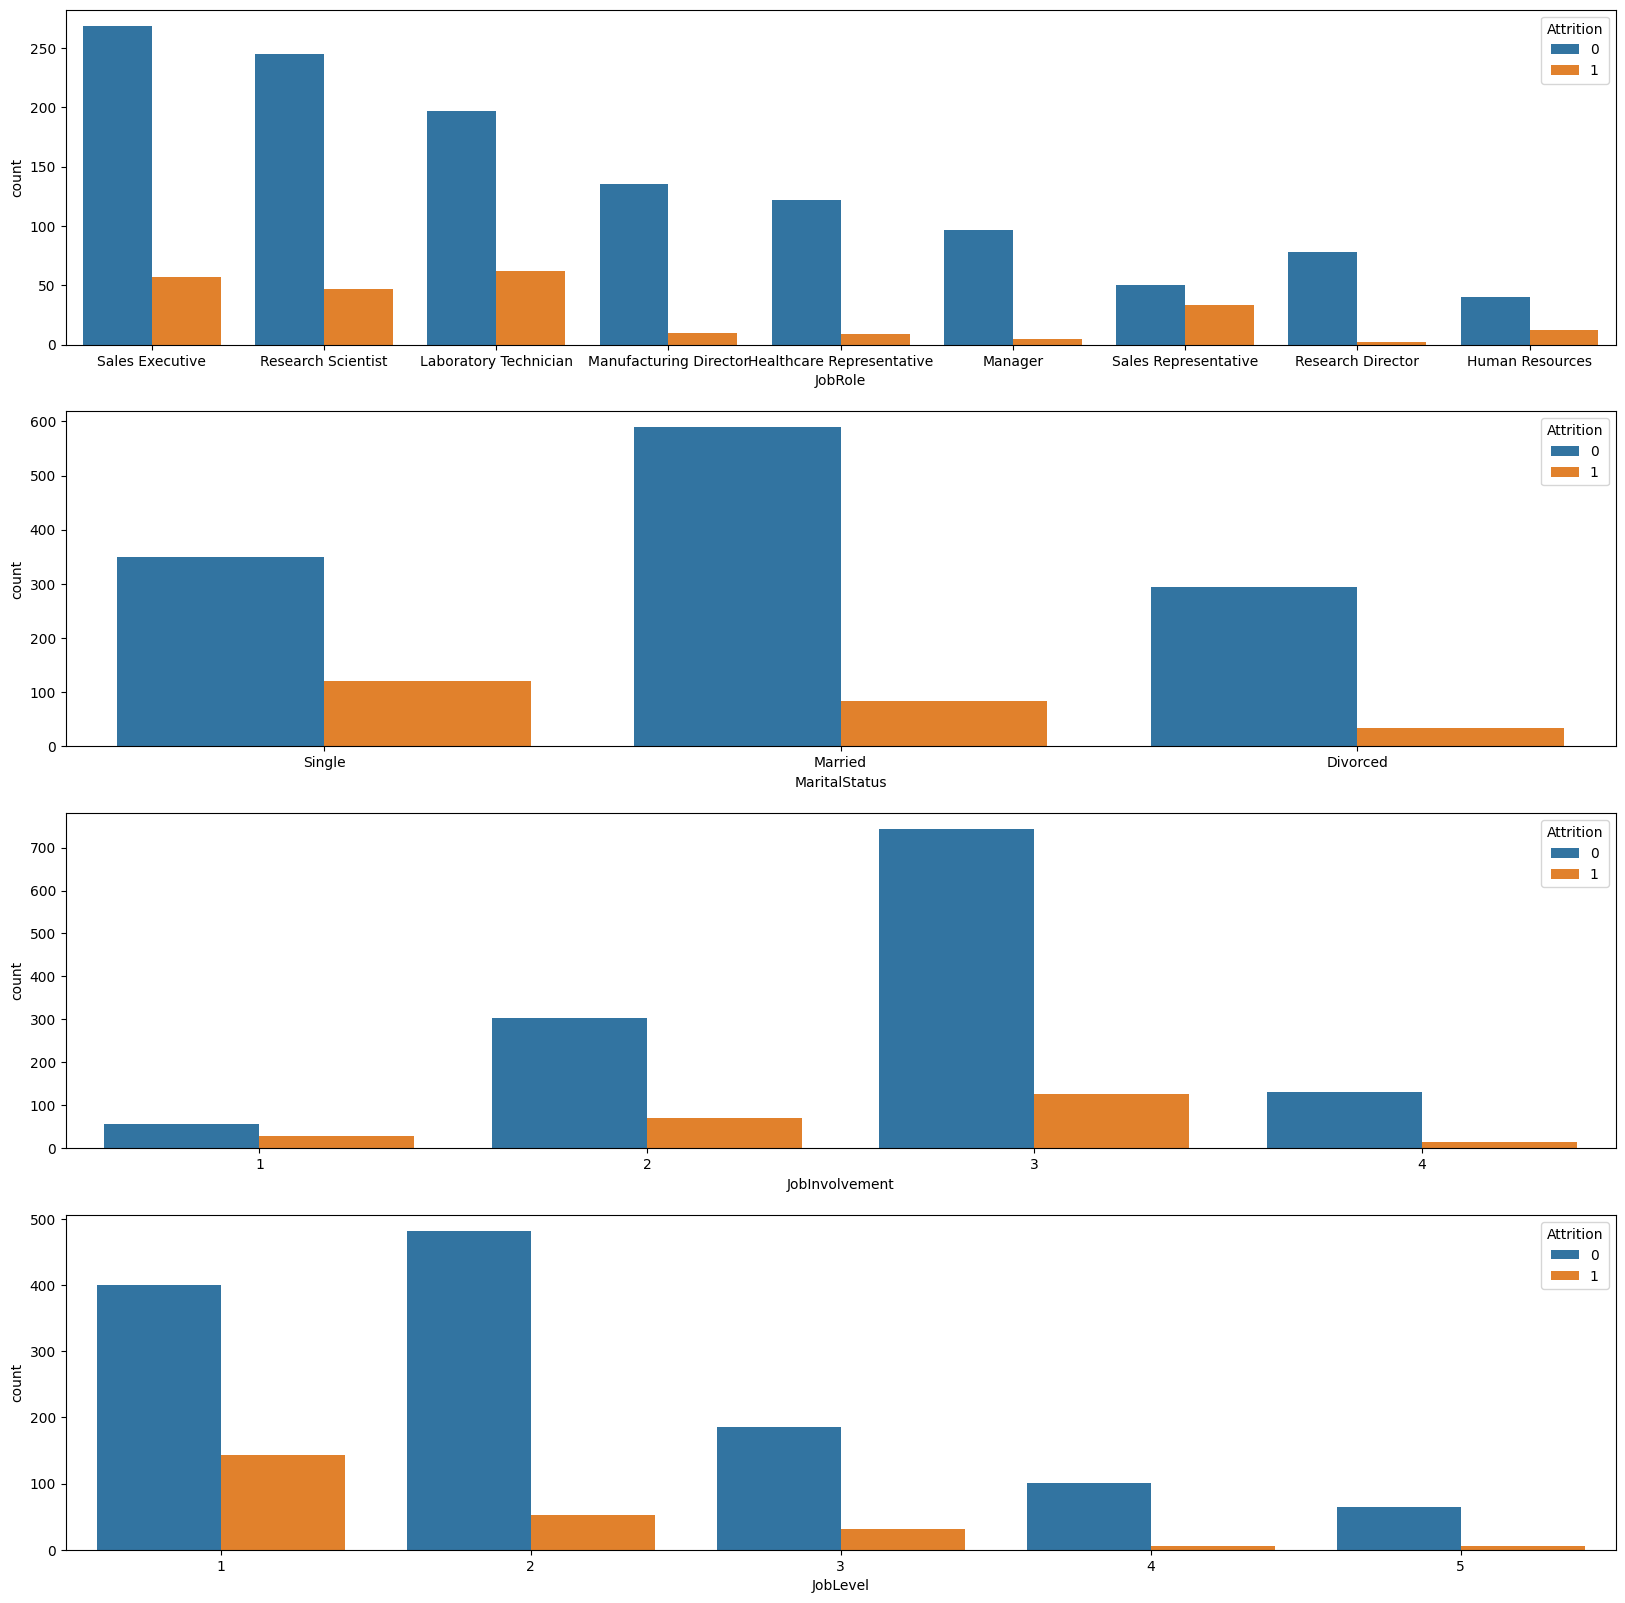

In [24]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = data_main)
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = data_main)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = data_main)
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = data_main)

# Single employees tend to leave compared to married and divorced
# Sales Representitives tend to leave compared to any other job 
# Less involved employees tend to leave the company 
# Less experienced (low job level) tend to leave the company 

In [25]:
dataset['Attrition'] = dataset['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
left_df        = dataset[dataset['Attrition'] == 1]
stayed_df      = dataset[dataset['Attrition'] == 0]

Text(0.5, 0, 'Distance From Home')

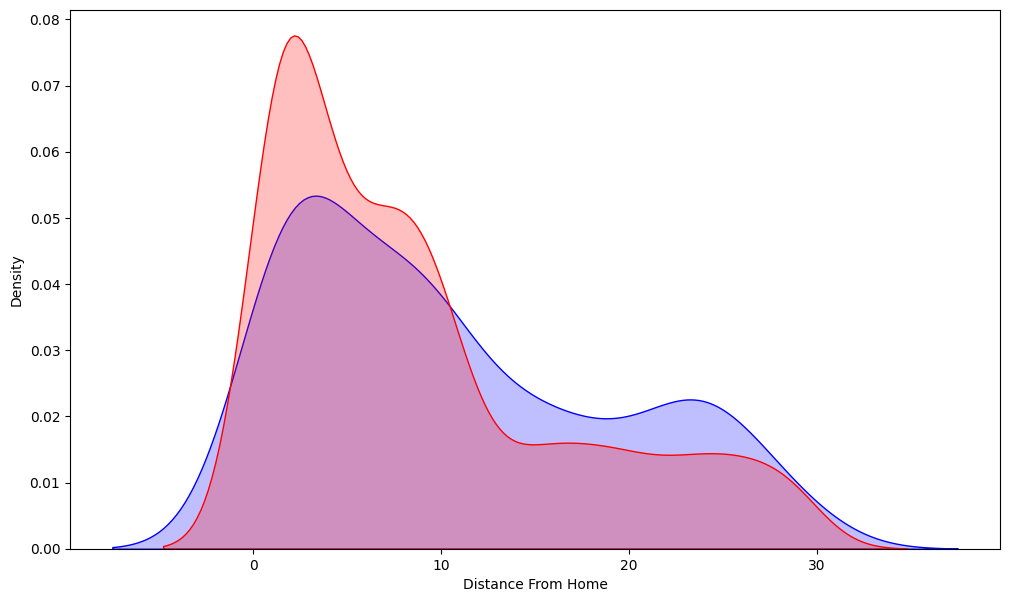

In [26]:
# Its DistanceFromHome vs stay/left


plt.figure(figsize=(12,7))

sns.kdeplot(left_df['DistanceFromHome'], label = 'Employees who left', fill = True, color = 'b')
sns.kdeplot(stayed_df['DistanceFromHome'], label = 'Employees who Stayed', fill = True, color = 'r')

plt.xlabel('Distance From Home')


Text(0.5, 0, 'Years With Current Manager')

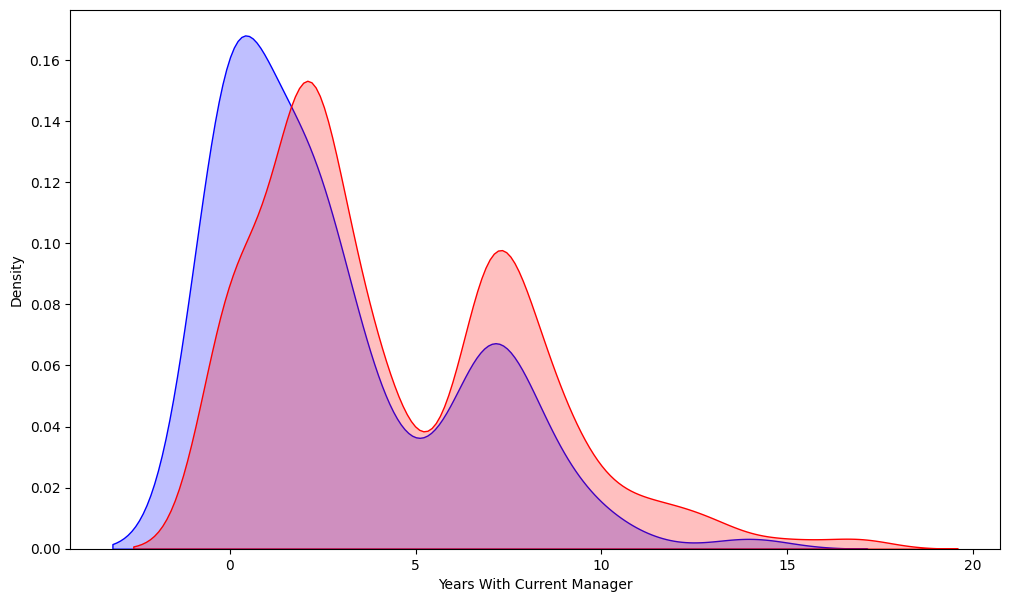

In [27]:
plt.figure(figsize=(12,7))

sns.kdeplot(left_df['YearsWithCurrManager'], label = 'Employees who left', fill = True, color = 'b')
sns.kdeplot(stayed_df['YearsWithCurrManager'], label = 'Employees who Stayed', fill = True, color = 'r')

plt.xlabel('Years With Current Manager')

Text(0.5, 0, 'Total Working Years')

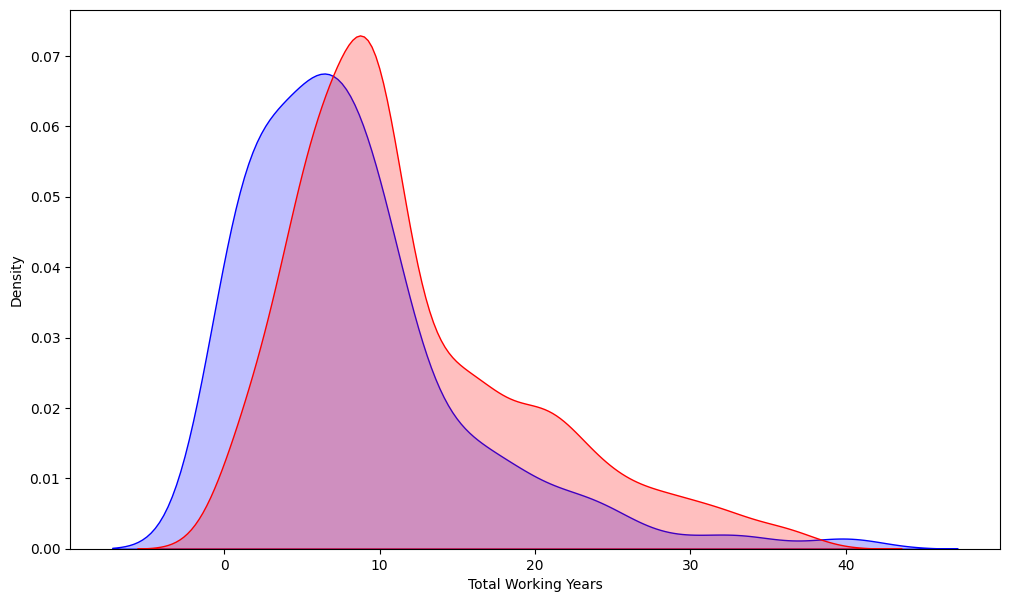

In [28]:
plt.figure(figsize=(12,7))

sns.kdeplot(left_df['TotalWorkingYears'], fill = True, label = 'Employees who left', color = 'b')
sns.kdeplot(stayed_df['TotalWorkingYears'], fill = True, label = 'Employees who Stayed', color = 'r')

plt.xlabel('Total Working Years')

<AxesSubplot: xlabel='JobSatisfaction', ylabel='count'>

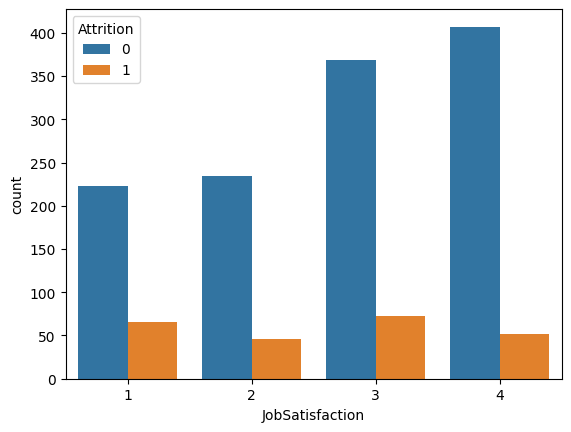

In [29]:
# Its JobSatisfaction vs stay/left
sns.countplot(x = 'JobSatisfaction', hue = 'Attrition', data = data_main)

<AxesSubplot: xlabel='MonthlyIncome', ylabel='Gender'>

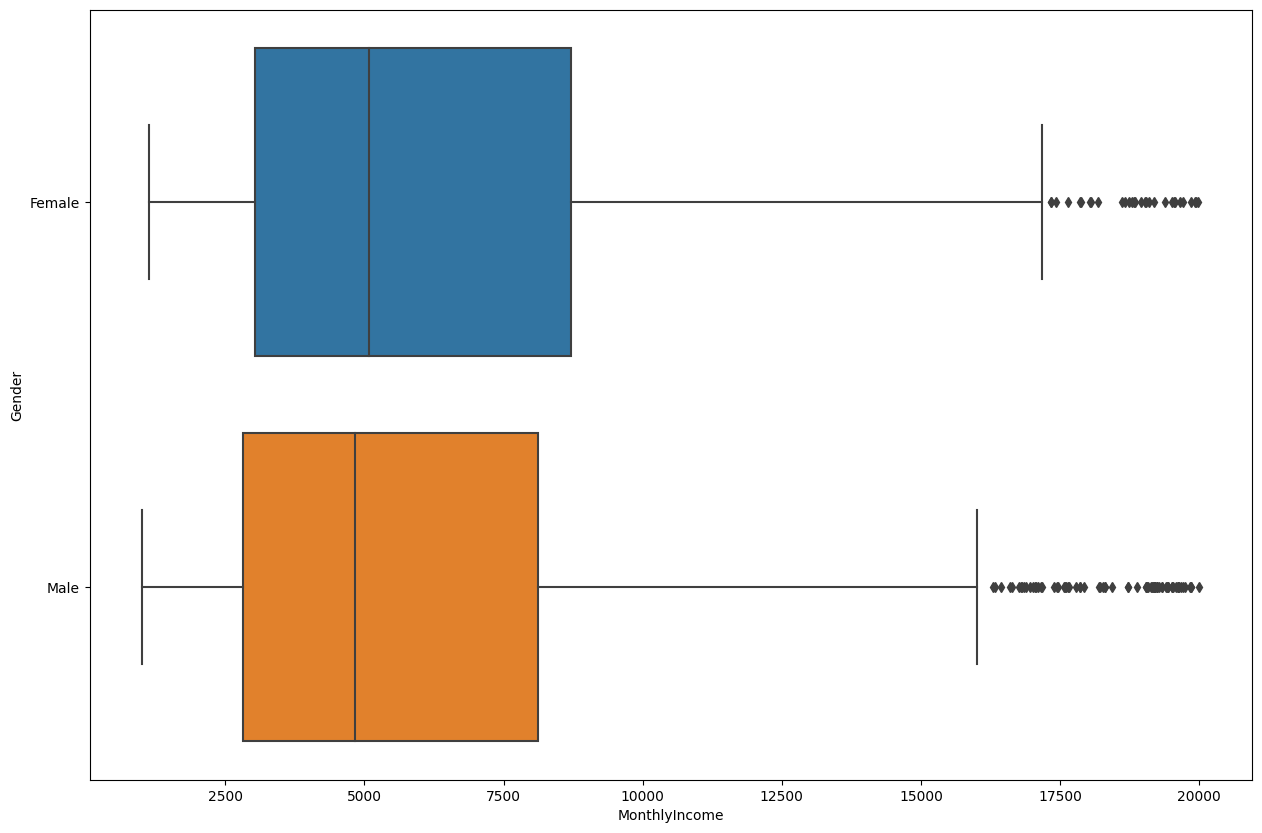

In [30]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data = data_main)

<AxesSubplot: xlabel='MonthlyIncome', ylabel='JobRole'>

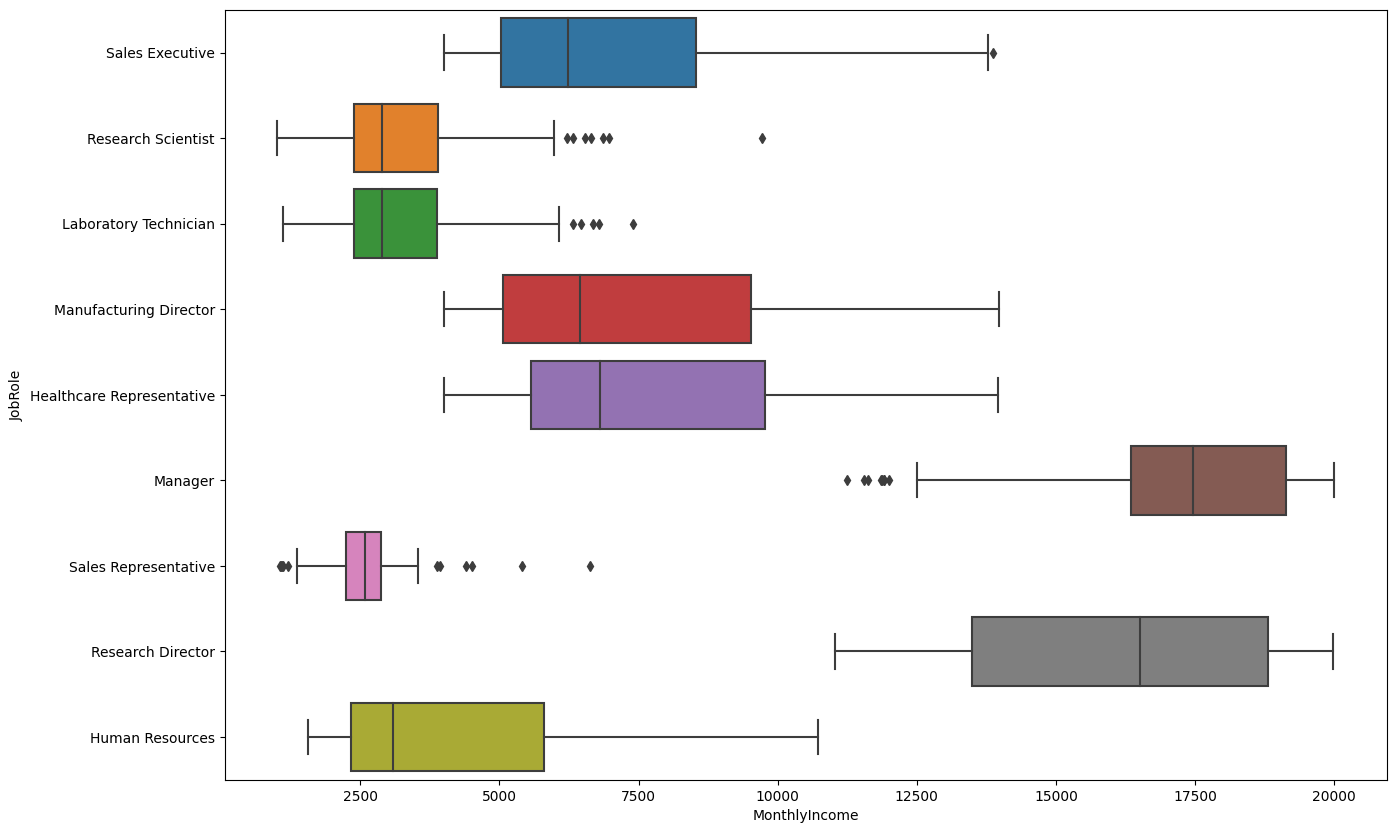

In [31]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = data_main)

<AxesSubplot: xlabel='Attrition', ylabel='count'>

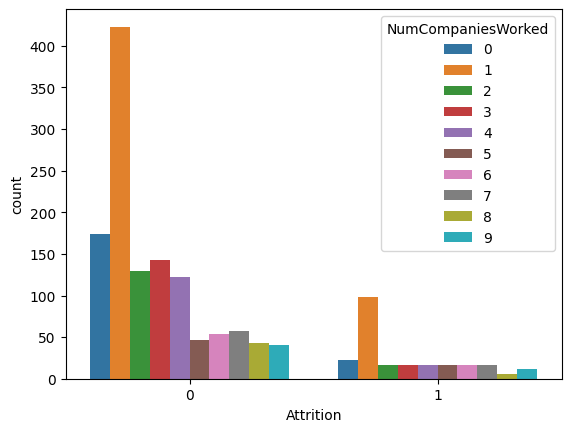

In [32]:
# Its NumCompaniesWorked vs stay/left
sns.countplot(x = 'Attrition',hue='NumCompaniesWorked',data=data_main)

<AxesSubplot: xlabel='Attrition', ylabel='count'>

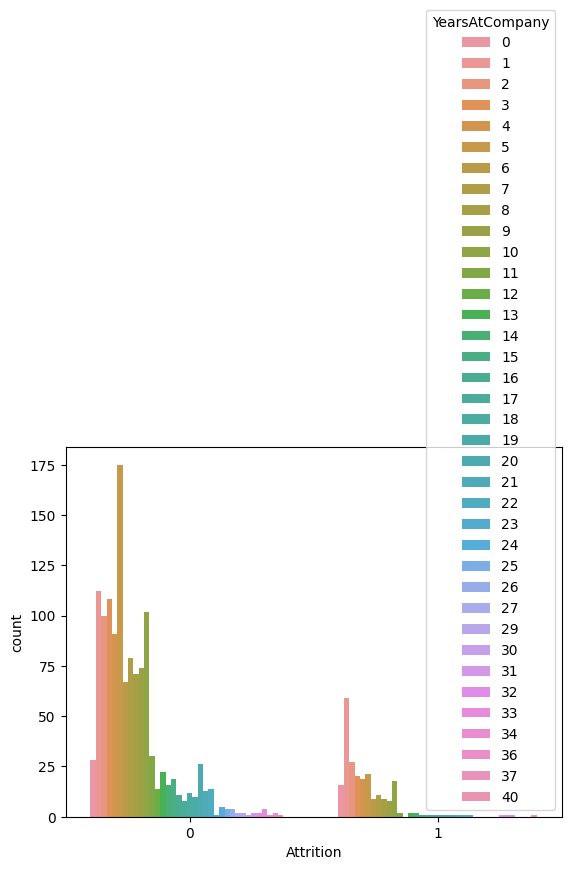

In [33]:
# Its YearsAtCompany vs stay/left
sns.countplot(x = 'Attrition',hue='YearsAtCompany',data=data_main)

<AxesSubplot: xlabel='Attrition', ylabel='count'>

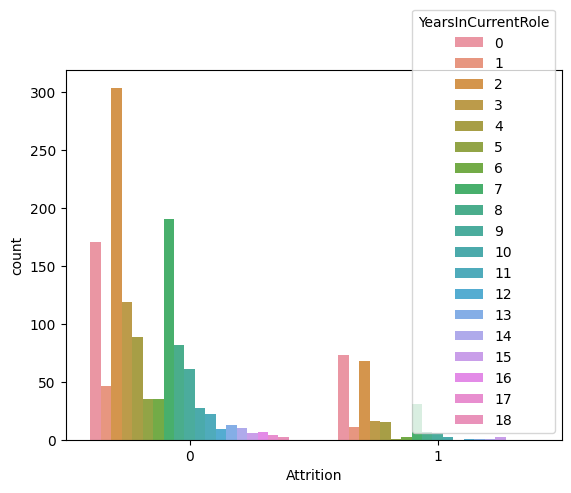

In [34]:
# Its YearsInCurrentRole vs stay/left
sns.countplot(x = 'Attrition',hue='YearsInCurrentRole',data=data_main)

<AxesSubplot: xlabel='Attrition', ylabel='count'>

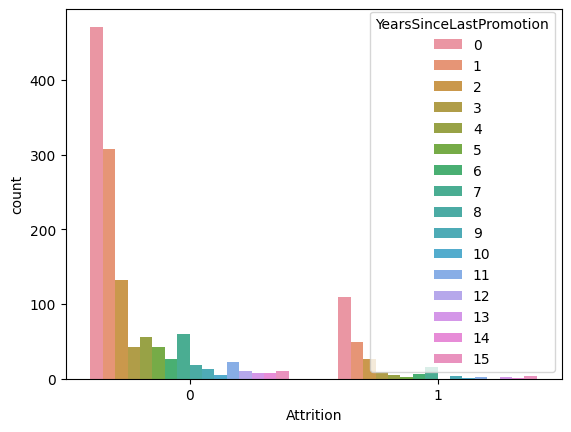

In [35]:
# Its YearsSinceLastPromotion vs stay/left
sns.countplot(x = 'Attrition',hue='YearsSinceLastPromotion',data=data_main)

<AxesSubplot: xlabel='Attrition', ylabel='count'>

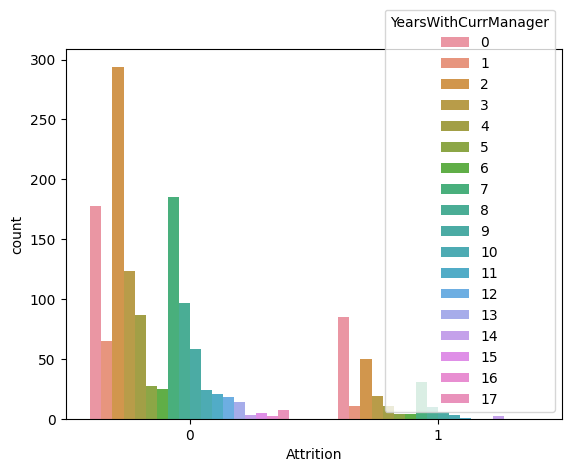

In [36]:
# Its YearsWithCurrManager vs stay/left
sns.countplot(x = 'Attrition',hue='YearsWithCurrManager',data=data_main)

C:\Users\ANITHA\AppData\Local\Temp\ipykernel_24152\2165825657.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=data_main.corr()


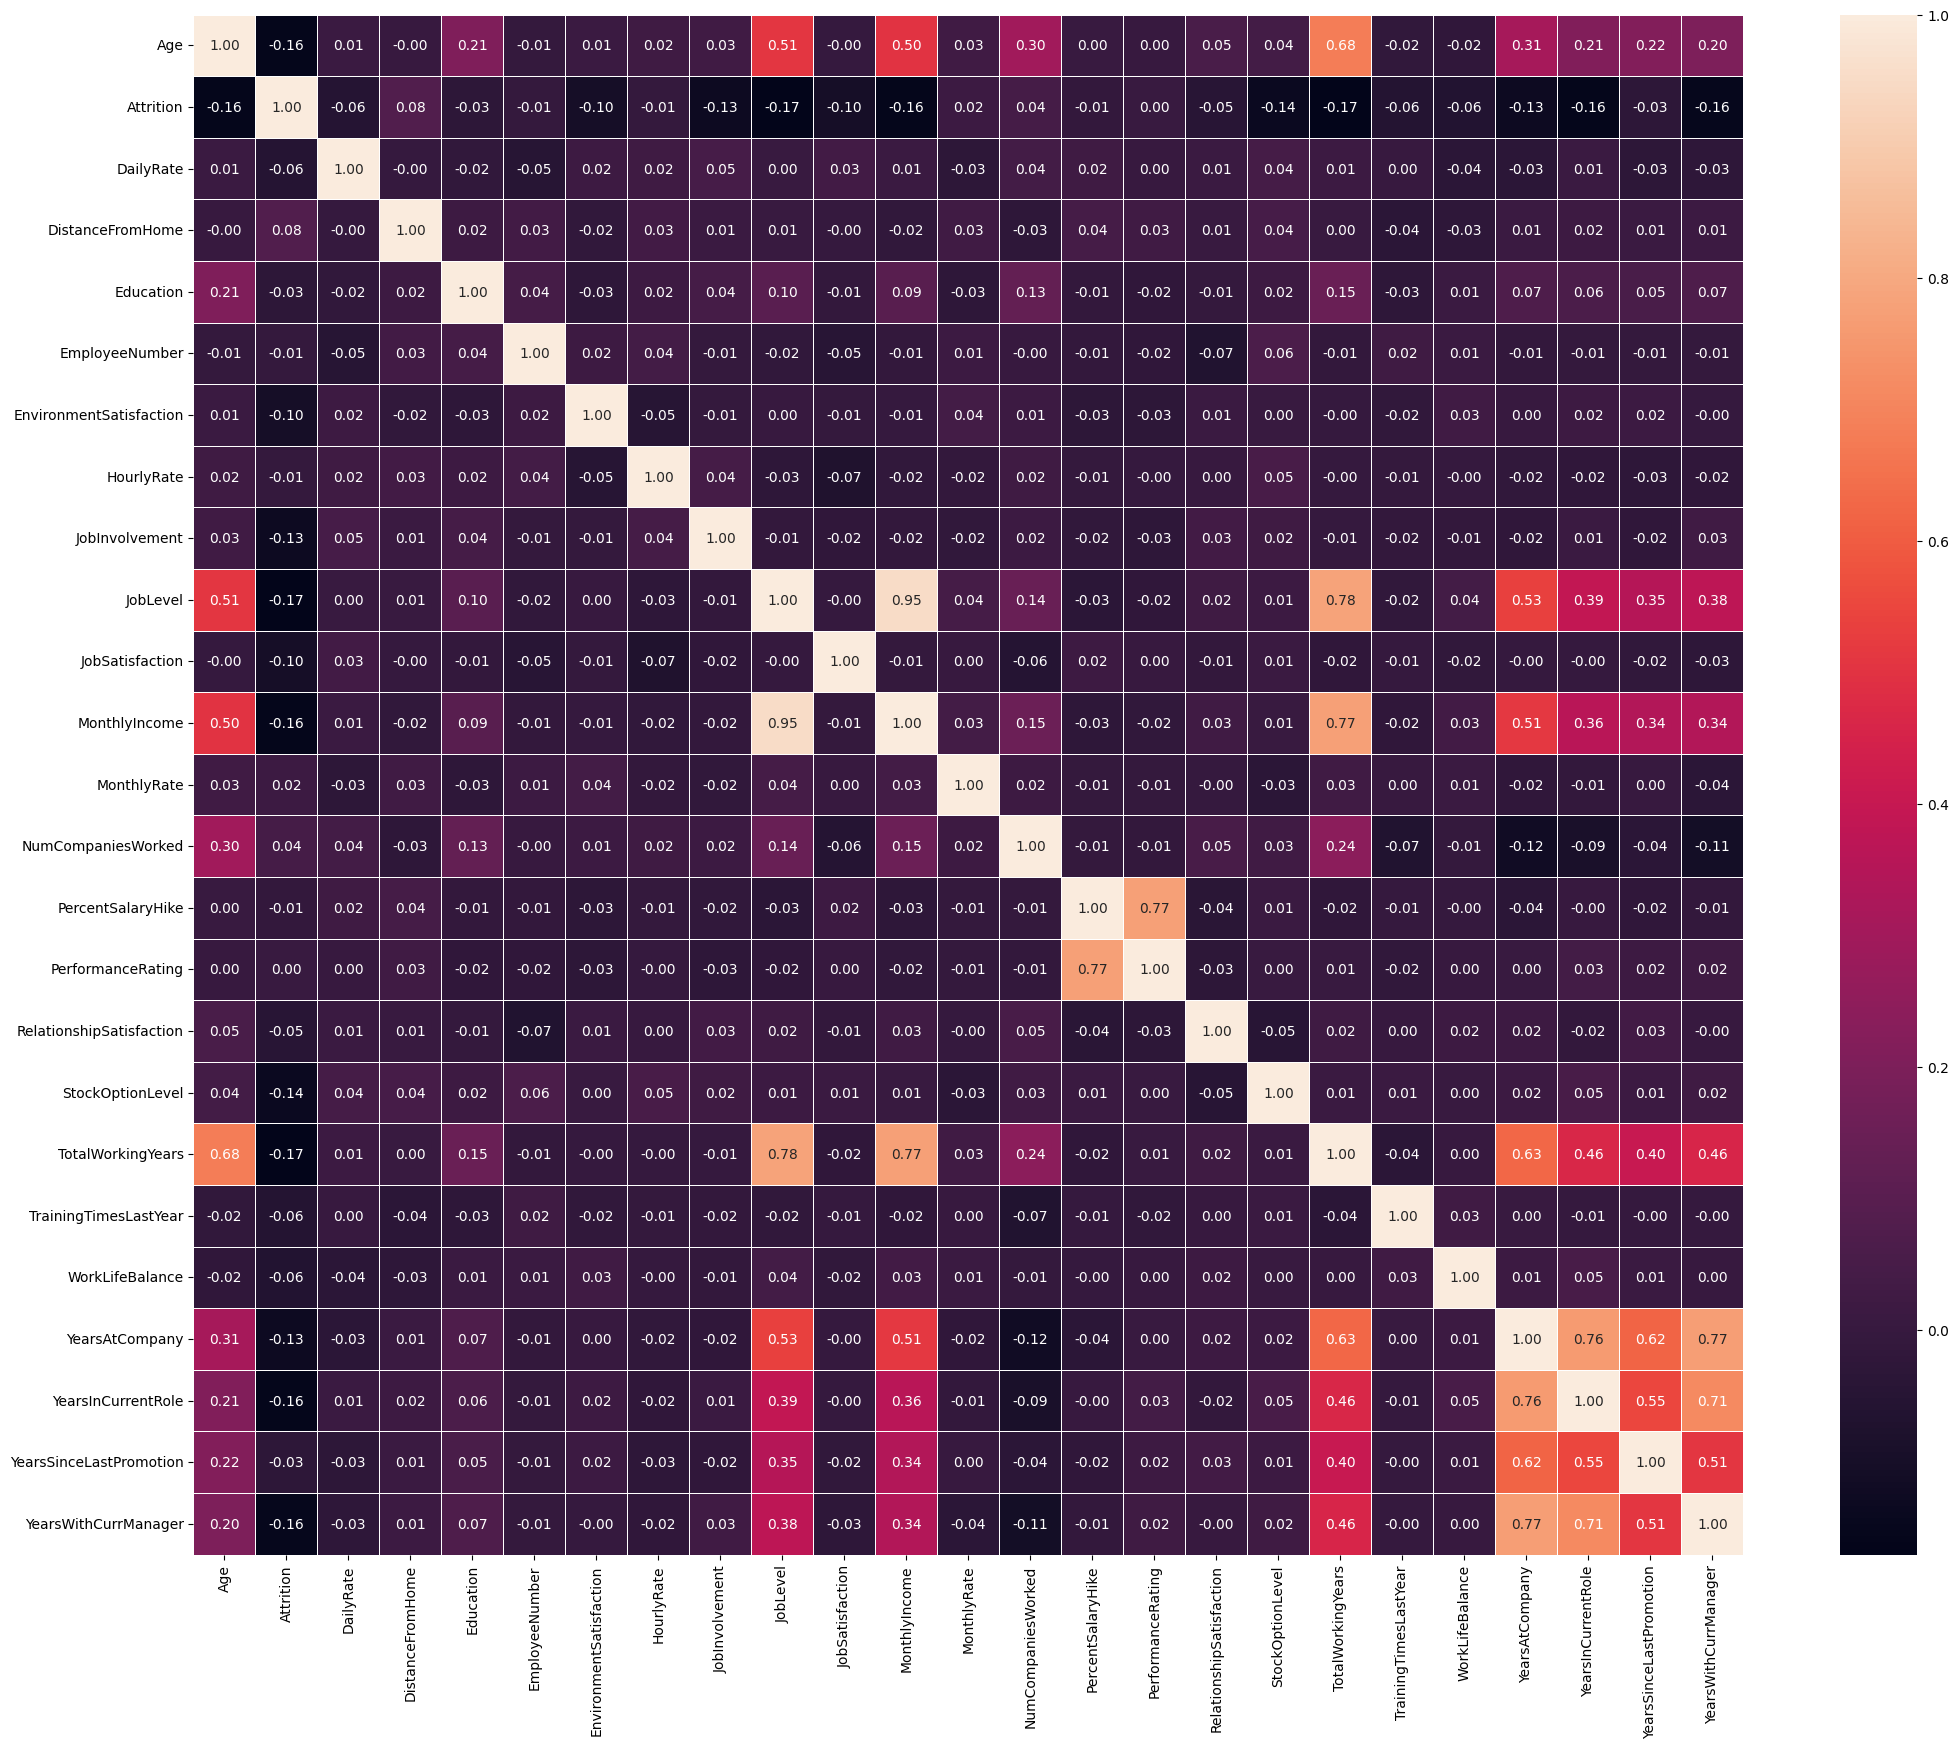

In [37]:
# Let's make our correlation matrix visual
corr_matrix=data_main.corr()
fig,ax=plt.subplots(figsize=(25,20))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

In [38]:
dataset = pd.get_dummies(data_main)
# from sklearn.preprocessing import OneHotEncoder
# oneh = OneHotEncoder(handle_unknown="ignore")
# features = data_main.columns
# oneh.fit(data_main[features])
dataset.head()
dataset.shape

(1470, 53)

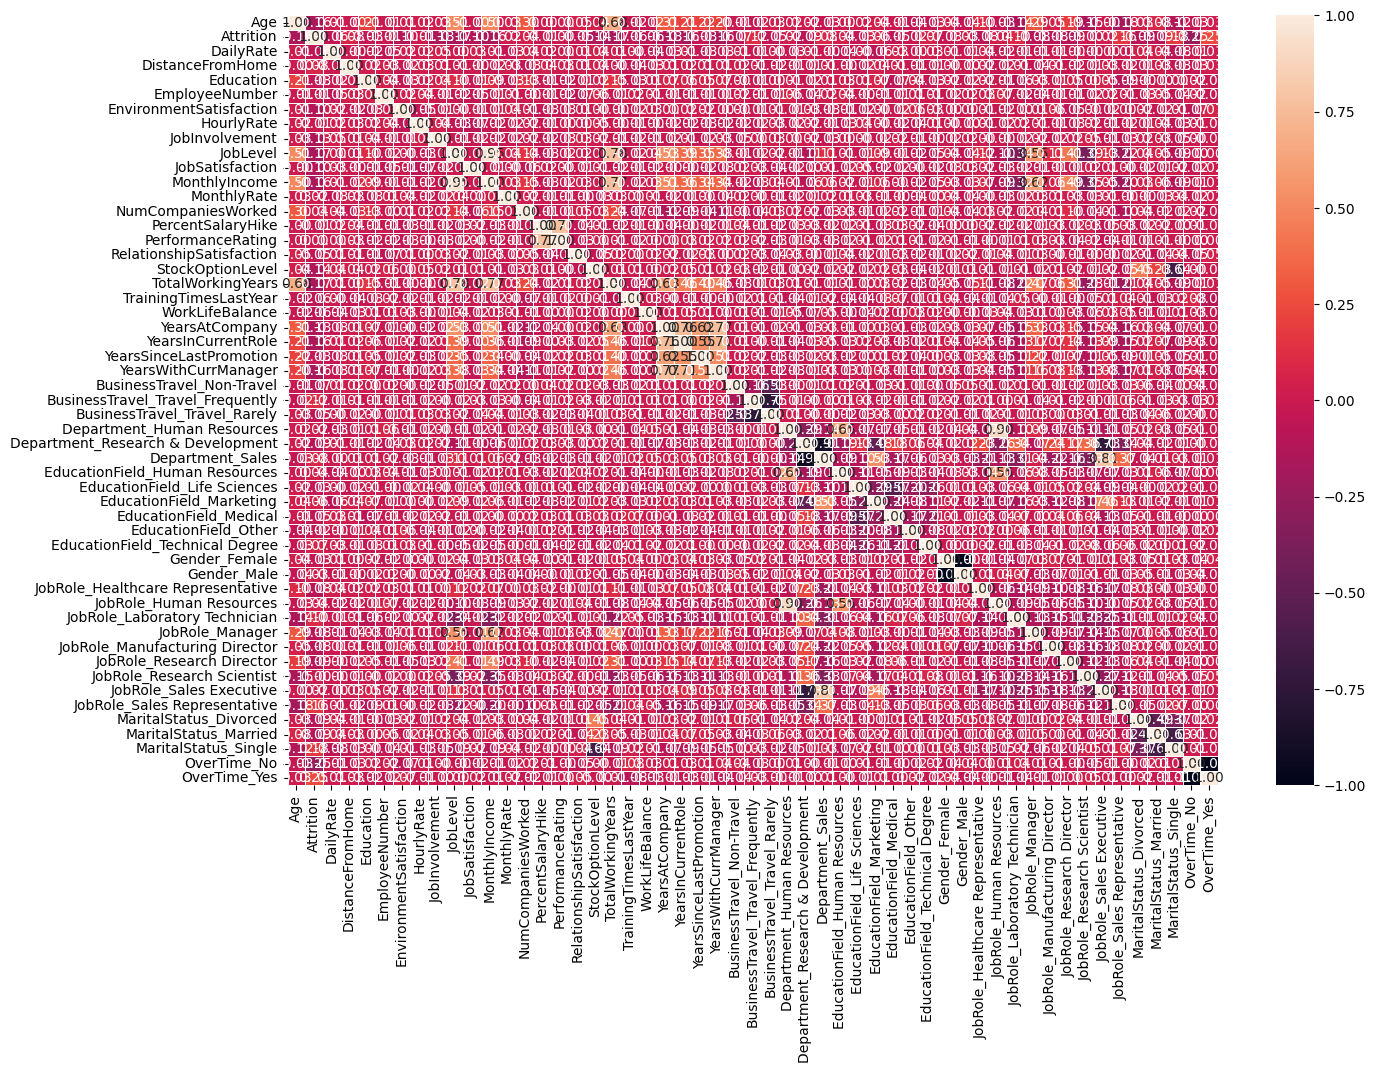

In [39]:
# Let's make our correlation matrix visual
corr_matrix=dataset.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

In [40]:
x=dataset.drop('Attrition',axis=1)
x.to_csv("processed HR.csv")
y=dataset.Attrition
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=4)
X_train.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
468,52,956,6,2,630,4,78,3,2,1,...,0,0,1,0,0,1,0,0,0,1
49,35,1229,8,1,63,4,36,4,1,4,...,0,0,0,0,0,0,1,0,1,0
524,34,1442,9,3,717,4,46,2,3,2,...,0,0,0,0,0,0,0,1,1,0
1101,32,824,5,2,1555,4,67,2,2,2,...,0,0,1,0,0,0,1,0,1,0
986,39,1498,21,4,1390,1,44,2,2,4,...,0,0,0,1,0,0,1,0,0,1


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logisticregressionmodel = LogisticRegression()
logisticregressionmodel.fit(X_train, y_train)

y_predlrm = logisticregressionmodel.predict(X_test)

C:\Users\ANITHA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
y_predlrm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

Accuracy 83.42391304347827 %
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       308
           1       0.00      0.00      0.00        60

    accuracy                           0.83       368
   macro avg       0.42      0.50      0.45       368
weighted avg       0.70      0.83      0.76       368



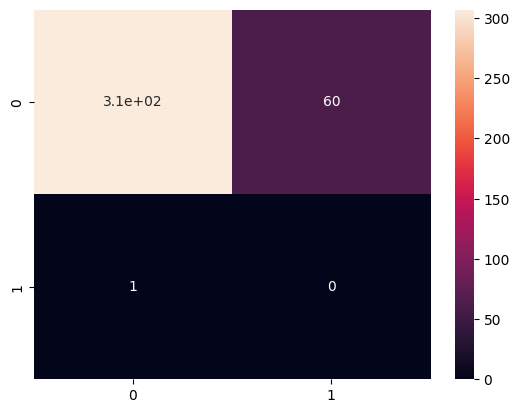

In [43]:
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy {} %".format( 100 * accuracy_score(y_predlrm, y_test)))

cm = confusion_matrix(y_predlrm, y_test)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predlrm))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy 83.69565217391305 %
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       308
           1       0.00      0.00      0.00        60

    accuracy                           0.84       368
   mac

C:\Users\ANITHA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANITHA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANITHA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1

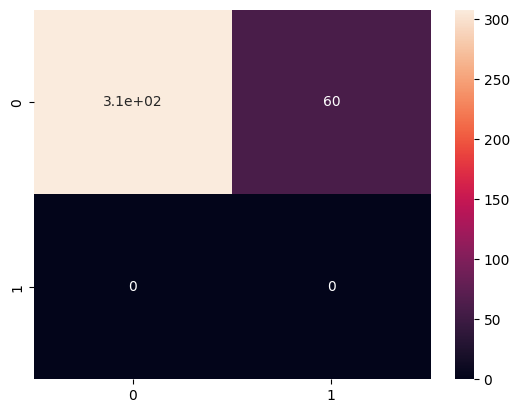

In [44]:
from sklearn.svm import SVC
svcmodel = SVC()
svcmodel.fit(X_train, y_train)
y_predsvc=svcmodel.predict(X_test)
print(svcmodel.predict(X_test))
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy {} %".format( 100 * accuracy_score(y_predsvc, y_test)))
cm = confusion_matrix(y_predsvc, y_test)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predsvc))

Accuracy 83.69565217391305 %
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       308
           1       0.00      0.00      0.00        60

    accuracy                           0.84       368
   macro avg       0.42      0.50      0.46       368
weighted avg       0.70      0.84      0.76       368



C:\Users\ANITHA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANITHA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANITHA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1

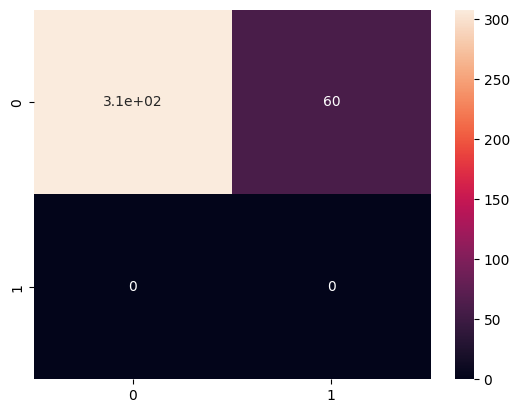

In [45]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
bcmodel = BaggingClassifier(SVC()).fit(X_train, y_train)
bcmodel.predict(X_test)
y_predbc=bcmodel.predict(X_test)
y_predbc
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy {} %".format( 100 * accuracy_score(y_predbc, y_test)))
cm = confusion_matrix(y_predbc, y_test)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predbc))

Accuracy 83.69565217391305 %
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       308
           1       0.00      0.00      0.00        60

    accuracy                           0.84       368
   macro avg       0.42      0.50      0.46       368
weighted avg       0.70      0.84      0.76       368



C:\Users\ANITHA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANITHA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANITHA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1

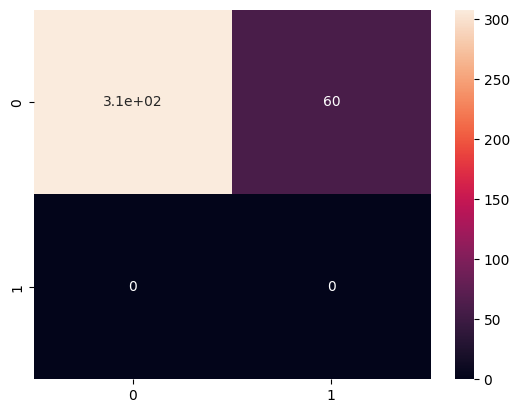

In [46]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh.predict(X_test)
y_predknn=bcmodel.predict(X_test)
y_predknn
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy {} %".format( 100 * accuracy_score(y_predknn, y_test)))
cm = confusion_matrix(y_predknn, y_test)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predknn))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       308
           1       0.71      0.17      0.27        60

    accuracy                           0.85       368
   macro avg       0.79      0.58      0.59       368
weighted avg       0.84      0.85      0.81       368



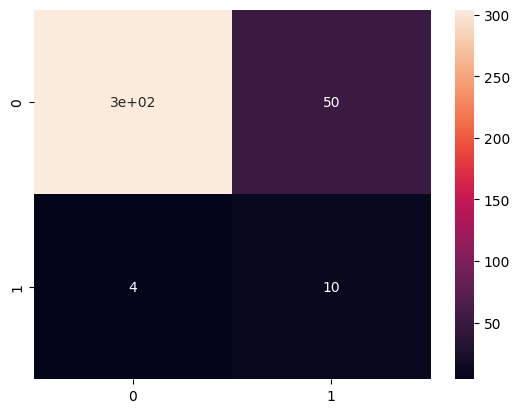

In [47]:
from sklearn.ensemble import RandomForestClassifier

rcmodel = RandomForestClassifier()
rcmodel.fit(X_train, y_train)

y_predrc = rcmodel.predict(X_test)
y_predrc

# Testing Set Performance
cm = confusion_matrix(y_predrc, y_test)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predrc))

Accuracy 86.68478260869566 %
              precision    recall  f1-score   support

           0       0.88      0.98      0.92       308
           1       0.72      0.30      0.42        60

    accuracy                           0.87       368
   macro avg       0.80      0.64      0.67       368
weighted avg       0.85      0.87      0.84       368



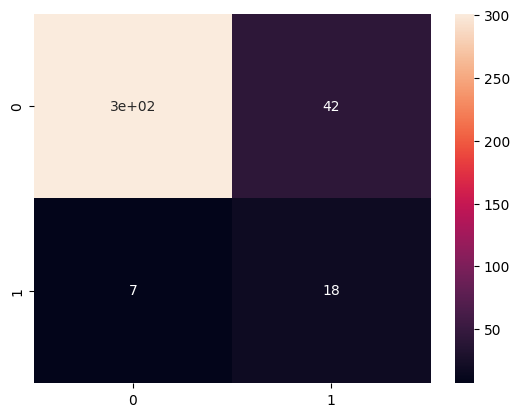

In [48]:
from xgboost import XGBClassifier
xgbmodel = XGBClassifier()
xgbmodel.fit(X_train, y_train)
y_predxgb=xgbmodel.predict(X_test)
y_predxgb
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy {} %".format( 100 * accuracy_score(y_predxgb, y_test)))
cm = confusion_matrix(y_predxgb, y_test)

sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predxgb))

Accuracy 86.68478260869566 %
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       308
           1       0.70      0.32      0.44        60

    accuracy                           0.87       368
   macro avg       0.79      0.65      0.68       368
weighted avg       0.85      0.87      0.84       368



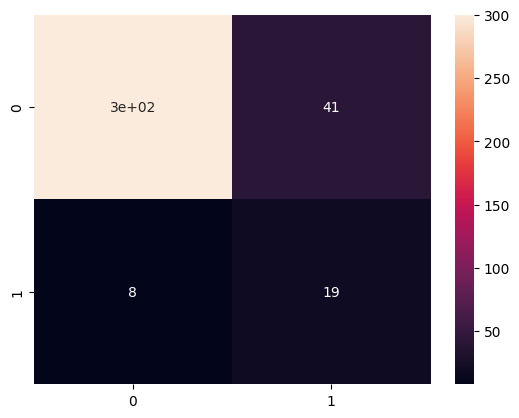

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
gbmodel = GradientBoostingClassifier()
gbmodel.fit(X_train, y_train)
y_predgb=gbmodel.predict(X_test)
y_predgb
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy {} %".format( 100 * accuracy_score(y_predgb, y_test)))
cm = confusion_matrix(y_predgb, y_test)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predgb))

In [50]:
models = []
models.append(('Logistic Regression',logisticregressionmodel))
models.append(('Random Forest', rcmodel))
models.append(('SVM', svcmodel))
models.append(('KNN', neigh))
models.append(('bc model',bcmodel))
models.append(('Xgboost',xgbmodel))
models.append(('gboost',gbmodel))


In [51]:
acc_results = []
names = []
col = ['Algorithm','Accuracy mean']
df_results = pd.DataFrame(columns=col)

In [52]:
from codecs import ignore_errors
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = KFold(
        n_splits=10, shuffle=True,random_state=7)  # 10-fold cross-validation

    cv_acc_results =cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')


    acc_results.append(cv_acc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_acc_results.mean()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['Accuracy mean'], ascending=False)

C:\Users\ANITHA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ANITHA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/st

,Algorithm,Accuracy mean
6,gboost,86.02
5,Xgboost,85.75
1,Random Forest,85.66
0,Logistic Regression,84.21
2,SVM,83.94
4,bc model,83.94
3,KNN,80.13


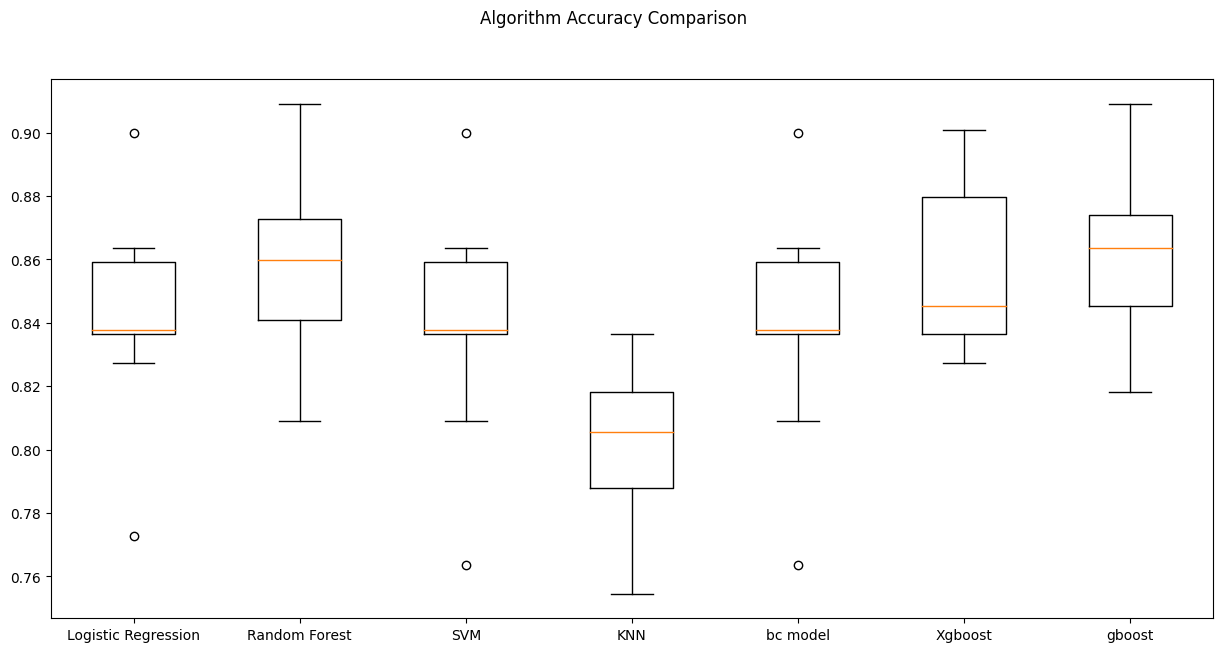

In [53]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

In [54]:
max=0
model=None
df=df_results
model_name=""
for i in range(len(df)):
    if(df.loc[i, "Accuracy mean"]>max):
        max=df.loc[i, "Accuracy mean"]
        model=df.loc[i, "Algorithm"]
print("The best prediction model with highest accuracy is:",model,"with accuracy:",max)

The best prediction model with highest accuracy is: gboost with accuracy: 86.02


In [55]:
if(model_name=="Logistic Regression"):
    model=logisticregressionmodel
elif(model_name=="Random Forest"):
    model=rcmodel
elif(model_name=="SVM"):
    model=svcmodel
elif(model_name=="KNN"):
    model=neigh
elif(model_name=="bc model"):
    model=bcmodel
elif(model_name=="xgboost"):
    model=xgbmodel
else:
    model=gbmodel


In [56]:
import pickle

# Save the trained model as a pickle string.
pickle.dump(model, open('model.pkl', 'wb'))

# Load the pickled model
model_from_pickle = pickle.load(open('model.pkl', 'rb'))

# Use the loaded pickled model to make predictions
model_from_pickle.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [57]:
for a,b in zip([logisticregressionmodel,rcmodel,svcmodel,gbmodel,xgbmodel,neigh,bcmodel],["Logistic Regression","Random Forest","SVM","Gradient Boosting","Extreme Gradient Boosting","KNN","BaggingClassifier"]):
    a.fit(X_train,y_train)
    prediction=a.predict(X_train)
    y_pred=a.predict(X_test)
    score1=accuracy_score(y_train,prediction)
    score=accuracy_score(y_test,y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)

C:\Users\ANITHA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Logistic Regression] training data accuracy is : 0.843013
[Logistic Regression] test data accuracy is : 0.834239
[Random Forest] training data accuracy is : 1.000000
[Random Forest] test data accuracy is : 0.855978
[SVM] training data accuracy is : 0.839383
[SVM] test data accuracy is : 0.836957
[Gradient Boosting] training data accuracy is : 0.959165
[Gradient Boosting] test data accuracy is : 0.866848
[Extreme Gradient Boosting] training data accuracy is : 1.000000
[Extreme Gradient Boosting] test data accuracy is : 0.866848
[KNN] training data accuracy is : 0.874773
[KNN] test data accuracy is : 0.793478
[BaggingClassifier] training data accuracy is : 0.839383
[BaggingClassifier] test data accuracy is : 0.836957


In [58]:
model_scores={'Logistic Regression':logisticregressionmodel.score(X_test,y_test),
             'KNN classifier':neigh.score(X_test,y_test),
             'Support Vector Machine':svcmodel.score(X_test,y_test),
             'Random forest':rcmodel.score(X_test,y_test),
              'Bagging Classifier':bcmodel.score(X_test,y_test),
              'Gradient Boosting':gbmodel.score(X_test,y_test),
              'Extreme Gradient Boosting':xgbmodel.score(X_test,y_test)
             }
model_scores

{'Logistic Regression': 0.8342391304347826,
 'KNN classifier': 0.7934782608695652,
 'Support Vector Machine': 0.8369565217391305,
 'Random forest': 0.8559782608695652,
 'Bagging Classifier': 0.8369565217391305,
 'Gradient Boosting': 0.8668478260869565,
 'Extreme Gradient Boosting': 0.8668478260869565}

In [59]:
from sklearn.metrics import classification_report

rm_y_preds = xgbmodel.predict(X_test)

print(classification_report(y_test,rm_y_preds))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92       308
           1       0.72      0.30      0.42        60

    accuracy                           0.87       368
   macro avg       0.80      0.64      0.67       368
weighted avg       0.85      0.87      0.84       368



In [60]:
from sklearn.metrics import classification_report

rm_y_preds = gbmodel.predict(X_test)

print(classification_report(y_test,rm_y_preds))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       308
           1       0.70      0.32      0.44        60

    accuracy                           0.87       368
   macro avg       0.79      0.65      0.68       368
weighted avg       0.85      0.87      0.84       368



In [61]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,KNN classifier,Support Vector Machine,Random forest,Bagging Classifier,Gradient Boosting,Extreme Gradient Boosting
accuracy,0.834239,0.793478,0.836957,0.855978,0.836957,0.866848,0.866848


<AxesSubplot: >

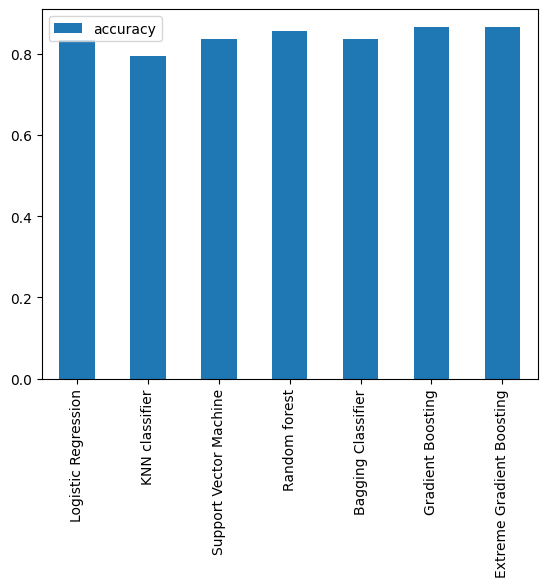

In [62]:
model_compare.T.plot(kind='bar')